# Tarea 4

1. Graficar como convergen $4$ condiciones iniciales a las raiz real de $x^3 - x^2 - x - 1$ utilizando el método de Newton. Ésto básicamente es gráficar como se mueven los puntos $x_k$, luego grafiquen el error relativo a la raiz, es decir $(x_k-S)/S$, donde $S$ es la raíz. (Tip: Si tienen un arreglo con todas las $x_k$'s que arrojó el método, digamos list, prueben hacer directamente $(list-S)/S$ ).

In [15]:
function f(x)      # Función de la que queremos obtener raíces
   x^3-x^2-x-1
end

f (generic function with 1 method)

In [16]:
function df(x)      #Derivada de la función
   3x^2-2x-1
end

df (generic function with 1 method)

In [236]:
function metodoNewtonR(x0)   #Función cuya entrada es el punto inicial
    list=zeros(Float64,100); #Creamos una lista que guardará el valor de la raíz obtenida por cada iteración, para después graficar si es que los puntos convergen a un valor
    x = x0;                  #Asignamos a x el valor de la condición inicial x0                  
    for i in 1:100           #Creamos un ciclo for con 200 iteraciones
        f = x^3-x^2-x-1
        df = 3x^2-2x-1
        x = x-f/df  # Iteración del método de Newton
        list[i]=x;  # En la lista creada vamos a ir guardando los resultados obtenidos
    end
    return list     #Finalmente la función arrojará la lista
end  

metodoNewtonR (generic function with 1 method)

In [237]:
list1= metodoNewtonR(90);   #Listas que almacenarán las iteraciones del método de Newton para 4 condiciones iniciales distintas
list2= metodoNewtonR(150);
list3= metodoNewtonR(120);
list4= metodoNewtonR(125);

In [232]:
using PyPlot

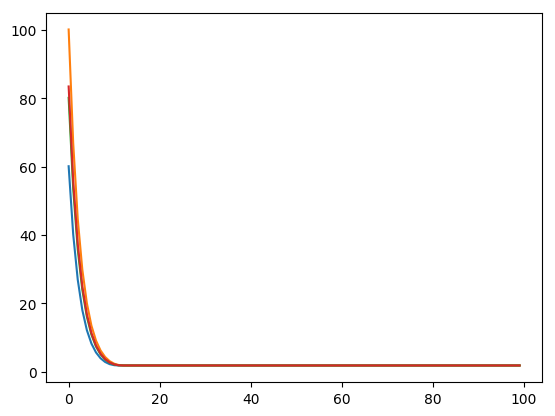

In [233]:
plot(real(list1))           #Graficando como se mueven los puntos de las cuatro listas.
plot(real(list2))
plot(real(list3))
plot(real(list4))
show();

Error relativo $(x_k-S)/S$

In [23]:
S=1.8392867552141612        #Calculando el error relativo de cada lista, punto a punto con la fórmula que se muestra arriba, donde S es la raíz
(list1-S)/S;
(list2-S)/S;
(list3-S)/S;
(list4-S)/S;

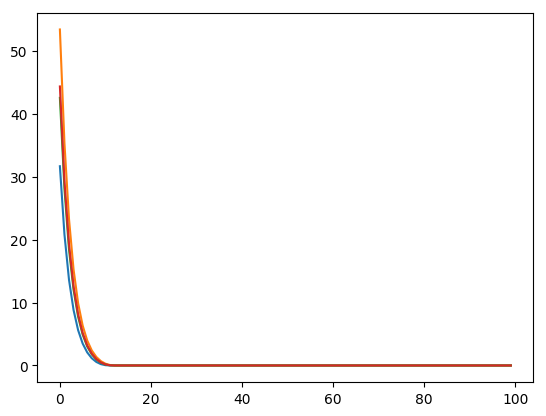

In [24]:
plot((list1-S)/S);           #Graficando el error relativo para las cuatro condiciones iniciales
plot((list2-S)/S);
plot((list3-S)/S);
plot((list4-S)/S);
show();

In [111]:
function biseccion(a,b)     #Función para método de la bisección, cuyas entradas son los extremos del intervalo.    
    list=zeros(Float64,50)  #Creamos una lista que guardará los valores obtenidos para cada iteración del ciclo (mostrado abajo), para después observar si es que los puntos convergen a un valor.
    p = (a+b)/2            # Punto medio del intervalo [a,b] #
    f(x) = x^3-x-2-x-1     # Función de la que queremos extraer la raíz real
    for i in 1:50          # Ciclo for con 50 iteraciones
        if  f(a)*f(p) > 0  #Si la función evaluada en el punto a por la función evaluada en el punto medio p es mayor que 0, se le asignará a a el valor de p.
            a = p
        end
        if f(b)*f(p) > 0   #Si la función evaluada en el punto b por la función evaluada en el punto medio p es mayor que 0, se le asignará a b el valor de p.
            b = p
        end
        p = (a+b)/2       #Volvemos a calcular el punto medio con los nuevos valores para los extremos del subintervalo
        list[i]=p         #En la lista se van a ir guardando los valores obtenidos
    end
    return list           #Finalmente la función regresará la lista
end;

In [112]:
list5 = biseccion(0,5);   #Listas que almacenarán las iteraciones del método de la bisección para 4 intervalos distintos.
list6 = biseccion(0,10);
list7 = biseccion(0,20);
list8 = biseccion(0,35);

In [113]:
using PyPlot

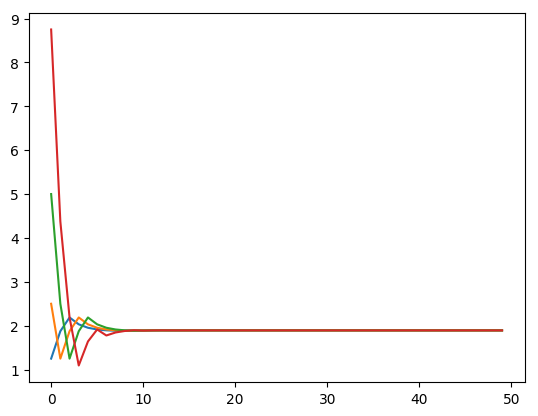

In [114]:
plot(real(list5))         # Graficando como se mueven los puntos de las cuatro listas.
plot(real(list6))
plot(real(list7))
plot(real(list8))
show();

In [115]:
S=1.8392867552141612      #Calculando el error relativo de cada lista, punto a punto con la fórmula que se muestra arriba, donde S es la raíz
(list5-S)/S;
(list6-S)/S;
(list7-S)/S;
(list8-S)/S;

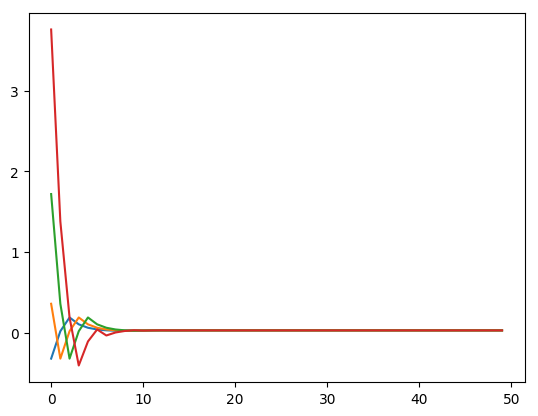

In [116]:
S=1.8392867552141612      #Graficando el error relativo para los cuatro intervalos
plot((list5-S)/S);
plot((list6-S)/S);
plot((list7-S)/S);
plot((list8-S)/S);
show();

2. Crear una función en Julia que implemente el método de Newton para funciones arbitrarias. Deberán crearla con las siguientes consideraciones 
Que tome como argumentos tanto a la función, su derivada y la condición inicial. Es decir, el input debe ser metodo_newton(f,df,x0). (Noten que aqui solo nos interesa la última iteración!, como lo hicieron en los primeros ejercicios)

In [247]:
function metodoNewton(x0,N,f,df)   #Función cuyas entradas son el punto inicial xo y el número N de iteraciones a realizar
    x = x0                    
    for i in 2:N              #Se crea un ciclo for para realizar las iteraciones del método de Newton
        x = x-f(x)/df(x)    
    end
    return x,f(x)             #La función arroja el valor de la aproximación de la raíz y el valor de la función evaluada en ese punto.
end

metodoNewton (generic function with 1 method)

In [248]:
metodoNewton(0.1,100,f,df)

(1.8392867552141612, 2.220446049250313e-16)

2.2 Hacer la misma función pero que en lugar de tomar como argumento una condición inicial, tome un rango amplio de condiciones iniciales, por ejemplo costruido con linspace. Es muy probable que funcione la rutina que crearon en el punto anterior llamandola como:
metodo_newton.(f,df,x) (noten el punto).

In [96]:
intervalo=linspace(0,7,3)       #Intervalo con linspace

0.0:3.5:7.0

In [107]:
function metodoconintervalos(f,df,intervalo)
    list=zeros(length(intervalo))  # Creamos una lista que tenga igual número de entradas que el intervalo creado con linspace.
    x = 0                          #Inicializamos
    for i in 1:length(intervalo)   # El primer ciclo va a avanzar sobre la longitud del intervalo.
        x = intervalo[i]           # A x se le va a ir asignando el valor i-ésimo del intervalo
        for n in 1:200             # Con este ciclo se va a realizar la iteración del método de Newton, con un total de 200 iteraciones.
            x = x-(f(x)/df(x))
        end
    list[i]=x;                     # En esta lista se van a ir guardando los valores de la raíz obtenida para cada iteración.
    end
    list                           # Finalmente la función va a regresar la lista con las raíces obtenidas.
end;

In [108]:
metodoconintervalos(f,df,intervalo)

3-element Array{Float64,1}:
 1.83929
 1.83929
 1.83929

2.3 Crear la misma rutina, pero que esta vez en lugar de dar como output todo el vector de raices (que inevitablemente estan repetidas), de solo la lista con la raices que son genuinamente diferentes hasta un $\epsilon$. Como tip, hagan $200$ iteraciones (quiza en realidad con $20$ baste), despues su rutina deberá guardar las raices diferentes en un vector, digamos $t$, aquí pueden usar push! para ir guardando las raíces en un vector inicializado como t=[]. El output tiene que ser precisamente t.

In [118]:
function metodoNewton_epsilon(intervalo)
    epsilon = 0.00000008
    t = []                                           #Arreglo vacío que almacenará las raíces que son distintas hasta un cierto epsilon.
    lista = metodoconintervalos(f,df,intervalo)      #La lista va a contener las raíces obtenidas con el método llamado metodoconintervalos, considerando el intervalo creado con linspace.
    push!(t,lista[1])                                #El primer elemento de la lista es el primer componente de la lista obtenida con el método de Newton para intervalos.
    for i in 1:length(t)                             #Con el primer ciclo for, se va a realizar el procedimiento para cada elemento de t.
        for k in 1:length(lista)                     #Con este ciclo se van a ir comparando elemento a elemento de la lista, para no incluir en el arreglo t, aquellos valores que sean iguales.
            if abs(t[i]-lista[k])>epsilon            #Si el valor absoluto de la diferencia entre las raíces es menor que el epsilon propuesta, se anexa esa raíz(componente k-ésimo de la lista) al arreglo t utilizando push
                push!(t,lista[k])
            end
        end
        return t                                     #La función nos regresará el arreglo t con las raíces que son distintas hasta un cierto epsilon.                             
    end
end

metodoNewton_epsilon (generic function with 1 method)

In [119]:
metodoNewton_epsilon(intervalo) #El arreglo de t sólo nos arroja un valor, debido a que con n=200, el número de iteraciones hace que las raíces convergan a esa valor, si se tomará un menor número de iteraciones, se podrían encontrar raíces distintas y por consiguiente el arreglo t tendría más de un elemento.

1-element Array{Any,1}:
 1.83929

2.4 Finalmente, desarrollen una función similar a la anterior, siguiendo los mismos pasos, pero esta vez que los inputs de la función del método sean solamente la función y la condición inicial.

Para esto deberán usar lo que aprendimos de SymPy y de como podemos convertir y/o evaluar funciones tanto en simbolos como en flotantes.

La función que reciba esta rutina debe ser de Julia y el output debe ser un flotante (No un número simbólico!), para la derivada pueden usar SymPy internamente, recuerden que es facil convertir funciones de Julia en funciones simbolicas evaluandolas en variables simbolicas; para regresarlas a funciones de Julia e iterarlas, consulten la parte donde vimos la función lambdify.

In [4]:
using SymPy

In [1]:
function f(x)      # Función de la que queremos obtener raíces, es una función de Julia
   x^3-x^2-x-1
end

f (generic function with 1 method)

In [9]:
function metodoNewton(x0,f)   #Función cuyas entradas son el punto inicial xo y la función f
    x = Sym("x")              #Con esta asignación podemos hacer a x, variable simbólica
    df=diff(f(x),x)           #Derivando la función con respecto a x
    dfJ=lambdify(df,[x])      #Utilizando lambdify podemos convertir a df en una función de Julia
    x=x0 
    for i in 2:100            #Se crea un ciclo for para realizar las iteraciones del método de Newton
        x = x-f(x)/dfJ(x)    
    end
    print("la raíz de f(x) es", " ", x)           #La función arroja el valor de la aproximación de la raíz.
end

metodoNewton (generic function with 1 method)

In [10]:
metodoNewton(5,f)   #Se realiza el método de Newton para la función tomando como condiciómn inicial 5.

la raíz de f(x) es 1.8392867552141612